<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch7_1~2_pg_409~427.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch7. 1 ~ 2 pg. 409 ~ 427

CHAPTER 07 군집화

01 K-평균 알고리즘 이해

K-평균: 군집화 주로 사용, 군집 중심점이라는 특정 임의 지점을 선택해 해당 중심에 가장 가까운 포인트 선택하는 군집화 기법

-> 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적 수행, 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 시 반복을 멈추고 해당 중심점에 속하는 데이터 포인트를 군집화하는 기법





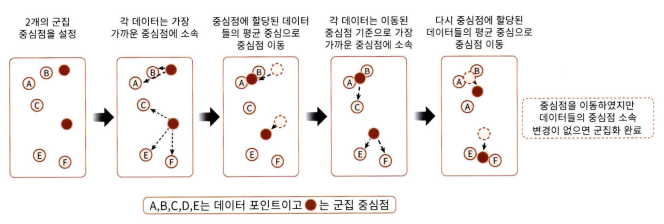

K평균이 위사진과 같이 동작

-장점: 군집화 많이 사용, 알고리즘 쉽고 간결

-단점: 거리기반알고리즘으로 속성개수 많을시 군집화 정확도 떨어짐, 반복 횟수 많을 경우 수행 시간 느려짐, 몇 개의 군집을 선택해야할지 가이드 어려움

사이킷런 KMeans 클래스 소개

다음과 같은 초기화 파라미터 가짐

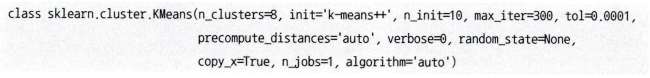

-> 주요 속성: labels_, cluster_centers_

K-평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침, 꽃잎의 길이에 따라 품종 분류

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
#더 편리한 데이터 핸들링을 위해 df로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#붓꽃 데이터 세트 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
#0,1,2 차례로 첫번째, 두번째, 세번째 군집에 속한것
#실제 분류값 target과 군집화 분류값 cluster 비교
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
#분류타깃이 0값인 데이터는 잘 그루핑됨, 하지만 target2값 데이터는 분산돼 그루핑됨
#붓꽃데이터 세트 군집화를 시각화, 2차원 평면상 개별 데이터의 군집화 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[: , 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


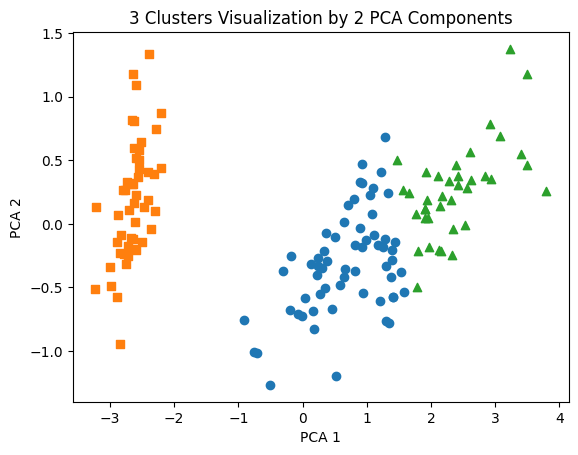

In [6]:
#pca_x는 x좌표값, pca_y는 y좌표값, 군집별 다른 마커로 산점도
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

cluster1이 네모로 명확히 분리됨 확인

군집화 알고리즘 테스트를 위한 데이터 생성

-> maek_blobs(): 개별 군집의 중심점과 표준편차 제어 기능 추가돼있음, make_classification(): 노이즈 포함 데이터를 만드는데 사용

make_blobs() 호출 파라미터: n_samples, n_features, centers, cluster_std



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
#데이터프레임으로 변경
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


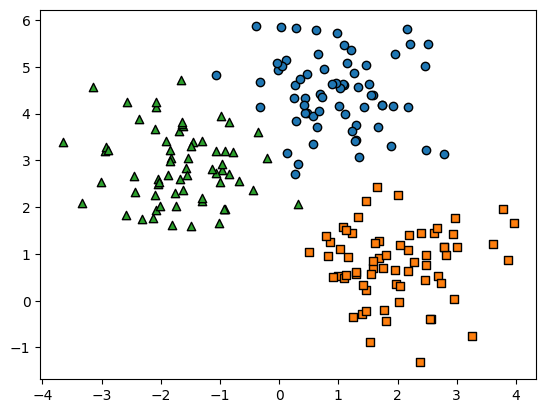

In [9]:
#make_blob()로 만든 피처 데이터 세트가 어떤 군집화 분포 가지고 만들어졌는지 확인

target_list = np.unique(y)

#각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
#target==0, target==1, target==2 로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-e67068536aac>:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)


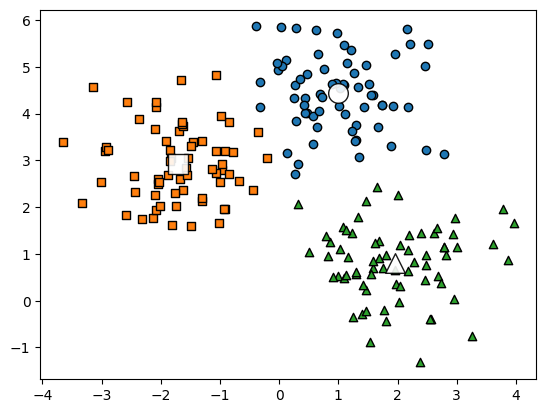

In [10]:
#KMeans군집화 수행후 군집별 시각화

#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='' % label)

plt.show()

In [11]:
#make_blobs()의 타깃과 kmeans_label은 군집번호 의미하므로 서로 다른값으로 매핑될 수 있음(산점도 마킹다를수있음)
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


makes_blobs()는 cluster_std 파라미터로 데이터 분포도 조절

cluster_std 가 작을 수록 군집 중심에 데이터가 모여있고, 클수록 데이터가 퍼져있음

02 군집 평가

군집화 성능 평가: 실루엣 분석

실루엣 분석: 각 군집간의 거리가 얼마나 효율적으로 분리돼있는지 나타냄-> 효율적 분리됨=다른 군집과 거리 떨어져있고 동일 군집끼리 데이터 서로 가깝게 잘 뭉쳐있음 의미

-> 실루엣 계수 기반: 개별 데이터가 가지는 군집화 지표, 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고, 다른 군집 데이터와 얼마나 멀리 분리돼있는지 나타내는 지표

a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

b(i)-a(i): 두 군집간 거리가 얼마나 떨어져있는가
-> 정규화하려면 max(a(i),b(i)로 나눔

실루엣 계수 s(i) = (b(i)-a(i))/(max(a(i),b(i)))

-> -1~1사이로 1에 가까우면 군집과 더 멀리떨어져있고 0에 가까우면 근처 군집과 가까워진다는 것, -값은 아예 다른 군집에 할당됐음 의미

-좋은 군집화 조건: 전체 실루엣 계수의 평균값 즉 사이킷런의 silhouette_score() 값이 0~1 사이, 1에 가까울 수록 좋음, 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야함

붓꽃 데이터 세트를 이용한 군집 평가

: 군집화 결과를 실루엣 분석으로 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [13]:
#평균 실루엣 계수 약 0.553으로 1번 군집의 경우 0.8 이상의 높은 실루엣 계수, 나머지는 평균보다 낮음
#군집별 평균 실루엣 계수값 알아보자
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번군집 0.79인 반편 나머지는 낮음

군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수값이 높다고 반드시 최적의 군집 개수로 군집화 잘됐다고 볼수는 없음

여러개의 군집 개수가 주어졌을때 평균 실루엣 계수로 군집 개수 최적화하는 방법

1. 군집 개수 2개로 정해짐-> 평균 실루엣 계수 0.704

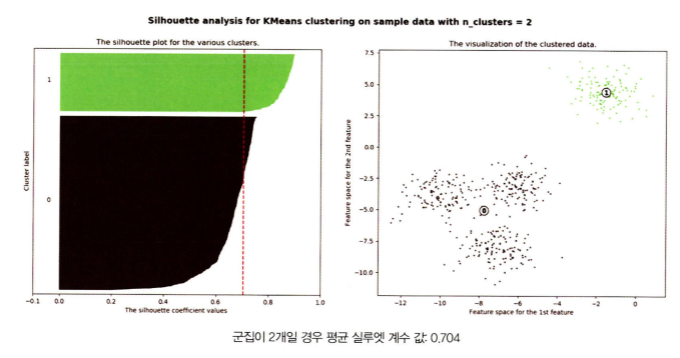

1번 군집의 경우 0번과 멀리 떨어져있고, 내부 데이터끼리도 잘뭉쳐 있음, 0번은 내부데이터끼리 떨어져있음

2. 군집개수 3개일 경우 평균 실루엣 계수 0.588

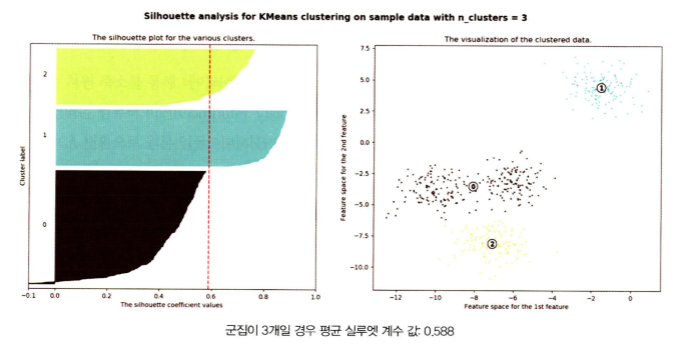

1번, 2번 군집의 경우 높은 실루엣 계수 가지지만 0번의 경우 낮음, 0번의 경우 내부 데이터 간의 거리도 멀고 2번 군집과도 가깝게 위치하기때문

3. 군집 4개인 경우 평균 실루엣 계수 0.65

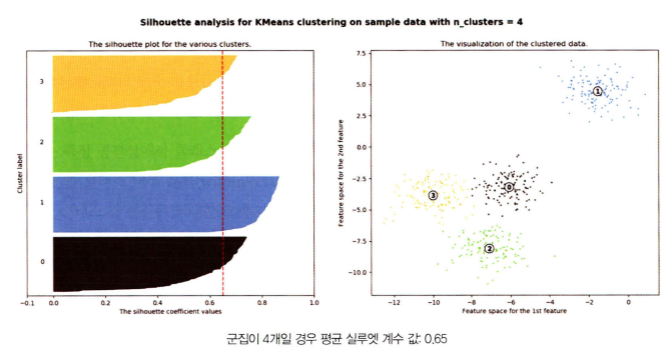

개별 군집의 평균 실루엣 계수값이 비교적 균일하게 위치

군집별 평균 실루엣 계수 값 구하는 부분만 별도 함수만들어 시각화해보자

In [17]:
#피처 데이터 세트에 대해 군집 2, 3, 4, 5개 일때의 군집별 평균 실루엣 계수 알고싶다면,
#visualize_silhouette([2, 3, 4, 5], X_features)

In [16]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
#visualize_silhouette([ 2, 3, 4, 5], X)

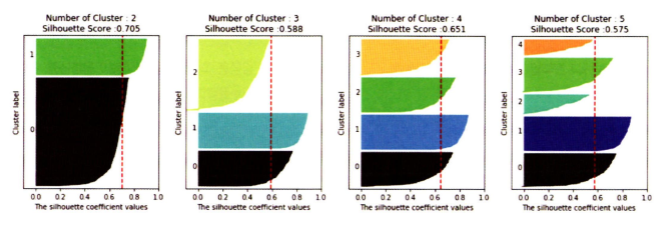

In [18]:
# K-평균 수행 시 최적의 군집 개수
from sklearn.datasets import load_iris
iris=load_iris()
#visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

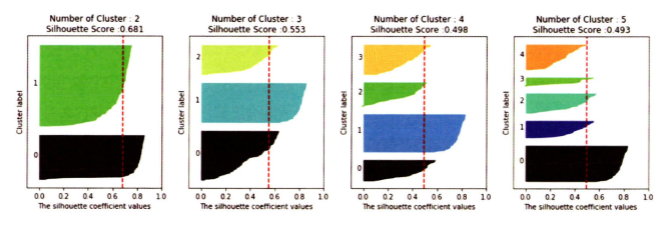

붓꽃 데이터 k-평균 군집화시 군집 개수 2개가 가장 좋아보임

실루엣 계수를 통한 k-평균 군집 평가방법은 직관적으로 이해하기 쉽지만 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야하므로 데이터 양이 늘어나면 수행시간이 크게 늘어남